In [1]:
from haversine import haversine, Unit
from matplotlib import pyplot as plt
from clickhouse_driver import Client 
import json
import numpy as np
with open("./clickhouse_host.json","r") as f:
    DB=json.loads(f.read())
client=Client(host=DB["ip"],user=DB["user"])


In [2]:
sensors_list = client.execute("select sensor_id,latt,long from purple_air.sensors") # get sensors

In [3]:
sensors_graph = {} # graph 

for i in range(len(sensors_list)):
    sensor1=(sensors_list[i][1],sensors_list[i][2])
    sensors_graph[sensors_list[i][0]]={}
    for j in range(len(sensors_list)):
        sensor2=(sensors_list[j][1],sensors_list[j][2])
        sensors_graph[sensors_list[i][0]][sensors_list[j][0]]=haversine(sensor1,sensor2) 
        # distance between all sensors
        

In [4]:
sensor_39255 = sensors_graph[39255]
sorted_39255_list = sorted(sensor_39255.items() ,  key=lambda x: x[1])
sensor_39255=[]
#get 10 nearest to sensor with id 39255
for i in range (0, 11):
    sensor_39255.append(sorted_39255_list[i][0])


In [5]:
sensor_39255

[39255, 2046, 18523, 38889, 23637, 3336, 38295, 15197, 19497, 28633, 2888]

In [11]:
request_10_sensors="select value as "



median_sensors_0=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=8) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm') group by Timestamp order by Timestamp")
median_sensors_12=client.execute('select toDayOfMonth(Timestamp) as Day, median(value) as "_2.5pm"'
                              +"from purple_air.sensors_telemetry where("
                              +"(toHour(Timestamp)=16) and toMonth(Timestamp)=1 "+ 
                              "and toMinute(Timestamp)=0 and parameter_name='2.5pm') group by Timestamp order by Timestamp")

/home/korolaab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


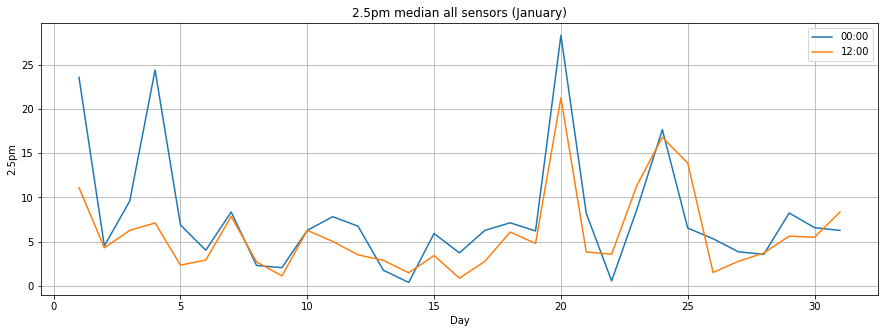

In [15]:
fig= plt.figure(figsize=[15,5])
time= [e[0] for e in median_sensors_0]
pm2_5=[e[1] for e in median_sensors_0]
plt.plot(time,pm2_5)
time= [e[0] for e in median_sensors_12]
pm2_5=[e[1] for e in median_sensors_12]
plt.plot(time,pm2_5)
plt.xlabel("Day")
plt.ylabel("2.5pm")
plt.grid("True")
plt.legend(("00:00","12:00"))
plt.title("2.5pm median all sensors (January)")
fig.show()